# Explore here

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, shapiro, levene

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')
data.to_csv("../data/raw/bank-marketing-campaign-data.csv", index=False)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data = data.drop_duplicates()

In [7]:
data.isnull().any().any()

False

In [8]:
data.shape

(41176, 21)

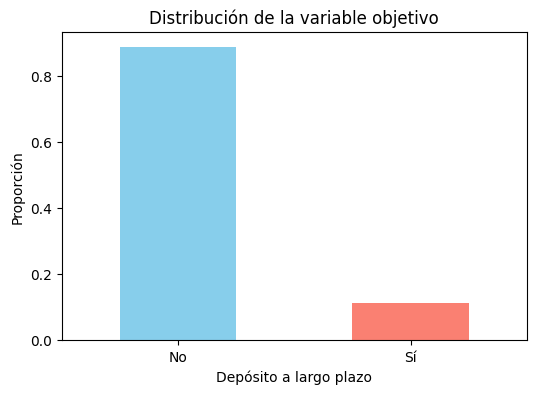

In [9]:
# Explorar la distribución de la variable objetivo
plt.figure(figsize=(6,4))
data['y'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de la variable objetivo')
plt.xlabel('Depósito a largo plazo')
plt.ylabel('Proporción')
plt.xticks([0,1], ['No', 'Sí'], rotation=0)
plt.show()

Información irrelevante / prescindible:

- 'contact': El método de contacto puede no ser relevante si se supone que todos los clientes ya están en la base de datos y se les puede contactar de cualquier manera.

- 'month' y 'day_of_week': A menos que el mes o el día de la semana del último contacto tengan un impacto significativo en la probabilidad de contratar un depósito a largo plazo, estas columnas podrían considerarse menos relevantes.

- 'duration': La duración del último contacto en segundos puede no ser relevante si solo estamos interesados en si el cliente suscribirá un depósito a largo plazo o no, independientemente de la duración del contacto.

- 'campaign': El número de contactos realizados durante esta campaña podría no ser relevante si solo estamos interesados en el resultado final (si el cliente suscribe o no un depósito a largo plazo) y no en el proceso específico de la campaña.

- 'pdays' y 'previous': El número de días desde el último contacto en una campaña anterior y el número de contactos realizados antes de esta campaña podrían no ser relevantes si estamos enfocados en identificar clientes potenciales para un depósito a largo plazo en la campaña actual.

- 'poutcome': A menos que el resultado de la campaña de marketing anterior tenga un impacto significativo en la probabilidad de contratar un depósito a largo plazo en la campaña actual, esta columna podría considerarse menos relevante.

Relación entre variables categóricas y variable objetivo (categórica):

In [10]:
# calculamos el valor p para la prueba chi-cuadrado entre cada columna categórica y la variable objetivo 'y'.
# Un valor p pequeño (<0.05) indica una asociación significativa entre la variable categórica y la variable objetivo,
# lo que sugiere que la columna categórica podría ser relevante para el análisis.

# Calculamos la tabla de contingencia entre "contact" y "y"
contingency_table_contact = pd.crosstab(data['contact'], data['y'])
# Realizamos la prueba chi-cuadrado entre "contact" y "y"
chi2_contact, p_contact, _, _ = chi2_contingency(contingency_table_contact)
print("Valor p para 'contact':", p_contact)

# Repetimos el proceso para las otras columnas categóricas
contingency_table_month = pd.crosstab(data['month'], data['y'])
chi2_month, p_month, _, _ = chi2_contingency(contingency_table_month)
print("Valor p para 'month':", p_month)

contingency_table_day_of_week = pd.crosstab(data['day_of_week'], data['y'])
chi2_day_of_week, p_day_of_week, _, _ = chi2_contingency(contingency_table_day_of_week)
print("Valor p para 'day_of_week':", p_day_of_week)

contingency_table_day_of_week = pd.crosstab(data['poutcome'], data['y'])
chi2_day_of_week, p_day_of_week, _, _ = chi2_contingency(contingency_table_day_of_week)
print("Valor p para 'poutcome':", p_day_of_week)


Valor p para 'contact': 1.7187406241263769e-189
Valor p para 'month': 0.0
Valor p para 'day_of_week': 3.085754965631743e-05
Valor p para 'poutcome': 0.0


Relación entre variables numéricas y variable objetivo (categórica):

Para elegir la prueba más idonea, examinaremos el contexto de los datos y de si cumplen los supuestos de las pruebas paramétricas. Para ello, observaremos la distribucion y la varianza.

Normalidad:

- Histograma: Visualiza la distribución de los datos con un histograma y compara con una distribución normal.
- Prueba de normalidad: Utiliza pruebas estadísticas como la prueba de Shapiro-Wilk o la prueba de Kolmogorov-Smirnov para evaluar si los datos siguen una distribución normal. Un valor p alto (> 0.05) indica que los datos pueden considerarse normalmente distribuidos.

Homogeneidad de varianzas:

- Gráfico de dispersión: Grafica los datos para ver si las varianzas son consistentes en todos los grupos.
- Prueba de homogeneidad de varianzas: Utiliza pruebas estadísticas como la prueba de Levene o la prueba de Bartlett para evaluar si las varianzas son iguales entre los grupos. Un valor p alto (> 0.05) indica que las varianzas son homogéneas.

/home/vscode/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41176.
  res = hypotest_fun_out(*samples, **kwds)
/home/vscode/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41176.
  res = hypotest_fun_out(*samples, **kwds)
/home/vscode/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41176.
  res = hypotest_fun_out(*samples, **kwds)
/home/vscode/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41176.
  res = hypotest_fun_out(*samples, **kwds)


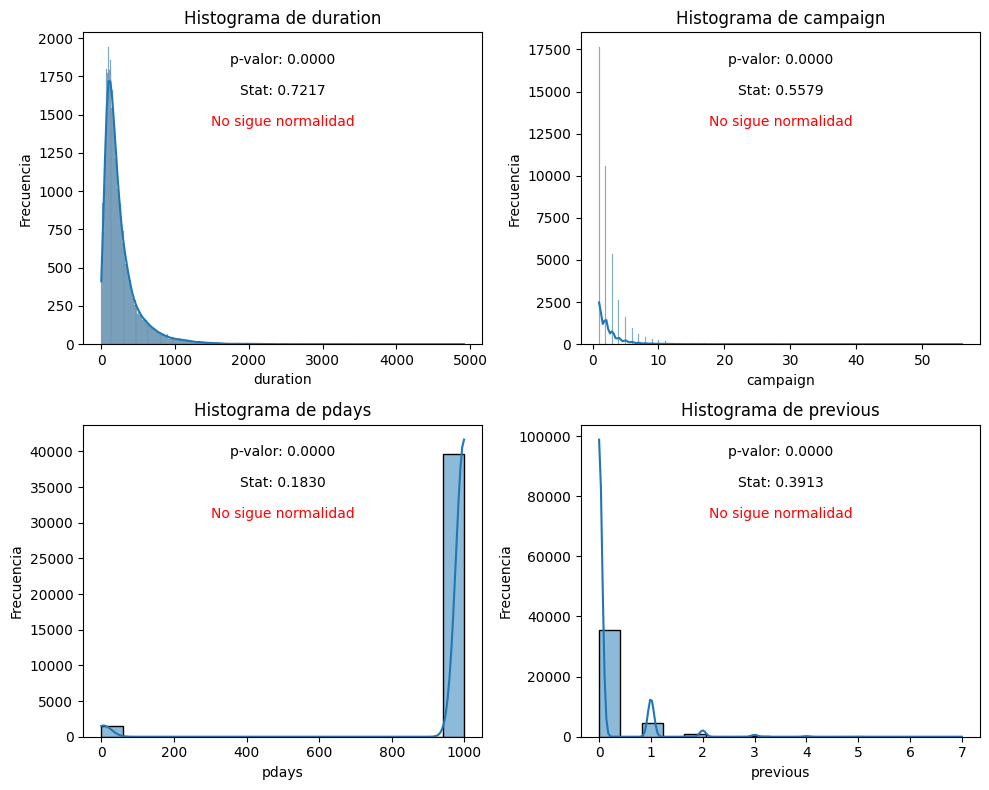

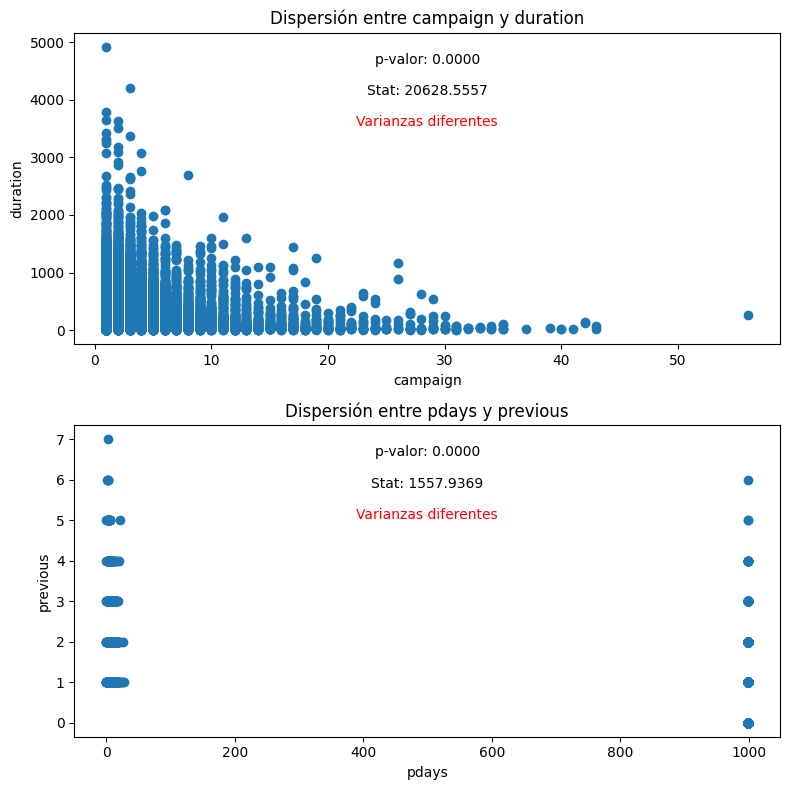

In [16]:
# Figura y ejes para los histogramas y las pruebas de normalidad
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Histogramas y pruebas de normalidad de Shapiro-Wilk
for i, column in enumerate(['duration', 'campaign', 'pdays', 'previous']):
    # Histograma
    sns.histplot(data[column], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Histograma de {column}')
    axes[i//2, i%2].set_xlabel(column)
    axes[i//2, i%2].set_ylabel('Frecuencia')

    # Prueba de normalidad de Shapiro-Wilk
    stat, p_value = shapiro(data[column])
    axes[i//2, i%2].text(0.5, 0.9, f'p-valor: {p_value:.4f}', transform=axes[i//2, i%2].transAxes, ha='center')
    axes[i//2, i%2].text(0.5, 0.8, f'Stat: {stat:.4f}', transform=axes[i//2, i%2].transAxes, ha='center')
    if p_value < 0.05:
        axes[i//2, i%2].text(0.5, 0.7, 'No sigue normalidad', transform=axes[i//2, i%2].transAxes, ha='center', color='red')
    else:
        axes[i//2, i%2].text(0.5, 0.7, 'Sigue normalidad', transform=axes[i//2, i%2].transAxes, ha='center', color='green')

# Ajustar espaciado entre subparcelas
plt.tight_layout()

# Figura y ejes para los gráficos de dispersión y las pruebas de homogeneidad de varianzas
fig2, axes2 = plt.subplots(2, figsize=(8, 8))

# Gráficos de dispersión y pruebas de homogeneidad de varianzas de Levene
for i, (column1, column2) in enumerate([('campaign', 'duration'), ('pdays', 'previous')]):
    # Gráfico de dispersión
    axes2[i].scatter(data[column1], data[column2])
    axes2[i].set_title(f'Dispersión entre {column1} y {column2}')
    axes2[i].set_xlabel(column1)
    axes2[i].set_ylabel(column2)

    # Prueba de homogeneidad de varianzas de Levene
    stat, p_value = levene(data[column1], data[column2])
    axes2[i].text(0.5, 0.9, f'p-valor: {p_value:.4f}', transform=axes2[i].transAxes, ha='center')
    axes2[i].text(0.5, 0.8, f'Stat: {stat:.4f}', transform=axes2[i].transAxes, ha='center')
    if p_value < 0.05:
        axes2[i].text(0.5, 0.7, 'Varianzas diferentes', transform=axes2[i].transAxes, ha='center', color='red')
    else:
        axes2[i].text(0.5, 0.7, 'Varianzas iguales', transform=axes2[i].transAxes, ha='center', color='green')

# Ajustar espaciado entre subparcelas
plt.tight_layout()